In [63]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

In [2]:
#create a pandas dataframes from csv files
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [3]:
users.info()
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [4]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


id                object
user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

In [5]:
#remove the text column to having a lighter dataframe
texts = tweets[['id', 'text']].copy()
texts.info()
texts.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      object
 1   text    object
dtypes: object(2)
memory usage: 208.5+ MB


id      object
text    object
dtype: object

In [6]:
tweets = tweets.drop('text', axis=1)
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
dtypes: object(9)
memory usage: 938.3+ MB


id                object
user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
dtype: object

In [7]:
tweets_ = tweets.drop_duplicates()
tweets_.info()
tweets_.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712597 entries, 0 to 13664695
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
dtypes: object(9)
memory usage: 893.6+ MB


id                object
user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
dtype: object

In [8]:
len(tweets_.id.unique())
#tweets_ = tweets_.drop_duplicates('id')

11672136

In [9]:
tweets_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712597 entries, 0 to 13664695
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
dtypes: object(9)
memory usage: 893.6+ MB


In [10]:
#count how much duplicates we have
a = tweets.duplicated()
i = 0
for (k,v) in a.items():
    if v == True:
        i = i + 1;
i

1952099

In [11]:
#count how much wrong data id
wrong_id = 0;
index_list = [];
for index, row in tweets['id'].items():
    #check id value
    if not isinstance(row, float):
        if not row.isnumeric():
            wrong_id = wrong_id + 1;
            index_list.append(index);
wrong_id

433863

In [12]:
#count how much wrong data id to verify 
wrong_id = 0;
index_list = [];
for index, row in tweets['id'].items():
    #check id value
    if not isinstance(row, float):
        if not row.isnumeric():
            wrong_id = wrong_id + 1;
            index_list.append(index);
wrong_id

433863

In [13]:
#delete all the wrong ids
tweets.drop(index_list, inplace=True)
tweets

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31
...,...,...,...,...,...,...,...,...,...
13664691,588535254207467520,587491046,0,0,0,0,0,1,2020-04-17 02:51:53
13664692,580420653666402304,1414080518,0,0,1,0,0,1,2020-03-25 17:27:22
13664693,718157017970961,91781300,0,NaN,l25suv5,NaN,0.0,NaN,2016-07-10 22:43:09
13664694,441301348676415488,127895572,0,0,1,1,0,0,2019-03-07 19:56:55


In [14]:
#count how much wrong retweet we have
wrong_retweet = 0
w_retweet_lst = []

for index, row in tweets['retweet_count'].items():
    #check retweet value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_retweet += 1
            w_retweet_lst.append(index)
    else:
        wrong_retweet += 1
        w_retweet_lst.append(index)

In [15]:
wrong_retweet

507304

## Count how much wrong retweet we have

In [16]:
wrong_reply = 0
w_reply_lst = []

for index, row in tweets['reply_count'].items():
    #check retweet value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_reply += 1
            w_reply_lst.append(index)
    else:
        wrong_reply += 1
        w_reply_lst.append(index)
wrong_reply

1420121

## Count how much wrong favorite we have

In [17]:
wrong_favorite = 0
w_favorite_lst = []

for index, row in tweets['favorite_count'].items():
    #check retweet value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_favorite += 1
            w_favorite_lst.append(index)
    else:
        wrong_favorite += 1
        w_favorite_lst.append(index)
wrong_favorite

1420127

## Check num_hashtag attributes:

In [18]:

wrong_htag = 0
w_htag_lst = []

for index, row in tweets['num_hashtags'].items():
    #check retweet value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_htag += 1
            w_htag_lst.append(index)
    else:
        wrong_htag += 1
        w_htag_lst.append(index)
wrong_htag
tweets['num_hashtags'][w_htag_lst[1000]]

nan

# Check created_at attributes: 

In [19]:

count_future = 0
count_past = 0
wrong_list = []
now = datetime.now()
launch_twitter = datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")

for index, row in tweets['created_at'].items():
    if (now - datetime.strptime(row,"%Y-%m-%d %H:%M:%S")).days < 0:
        count_future += 1
        wrong_list.append(index)
    if (datetime.strptime(row, "%Y-%m-%d %H:%M:%S") - launch_twitter).days < 0:
        count_past += 1
        wrong_list.append(index)
        


In [20]:
count_past

48803

In [21]:
count_future


48802

In [22]:
type(tweets['num_urls'][0])

str

## Count how much wrong num_url we have

In [23]:
wrong_url = 0
w_url_lst = []

for index, row in tweets['num_urls'].items():
    #check url value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_url += 1
            w_url_lst.append(index)
    else:
        wrong_url += 1
        w_url_lst.append(index)
wrong_url

1420118

## Count how much wrong num_mentions we have

In [24]:
wrong_mentions = 0
w_mentions_lst = []

for index, row in tweets['num_mentions'].items():
    #check url value
    if isinstance(row, str):
        if not row.isnumeric():
            wrong_mentions += 1
            w_mentions_lst.append(index)
    else:
        wrong_mentions += 1
        w_mentions_lst.append(index)
wrong_mentions

767725

# Check the attribute of the USERS file

#### sort users by id

In [28]:
users.sort_values(by=['id'], inplace=True)

,id,name,lang,bot,created_at,statuses_count
3878,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825.0
11430,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770.0
875,755116,呉⚛,en,0,2012-02-08 05:25:49,39158.0
10660,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035.0
1966,785080,W H,en,0,2012-02-23 01:08:16,22496.0
...,...,...,...,...,...,...
5505,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061.0
6441,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96.0
4324,3159993463,martin lee,en,0,2020-04-17 16:09:47,107.0
5128,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6.0


#### correction of the langauge attribute

In [51]:
users.lang.unique()

array(['en', 'ja', 'es', 'zh-tw', 'fr', 'en-gb', 'it', 'xx-lc', 'zh-cn',
       'pt', 'ru', 'tr', 'id', 'de', 'ko', 'nl', 'sv', 'ar', 'da', 'fil',
       'el', 'pl', 'select language...', 'en-au'], dtype=object)

In [60]:
for index, row in users['lang'].items():
    users['lang'][index] = row.lower()  
    if row == 'select language...': 
        2-1 #dosomething

C:\Users\cavol\AppData\Local\Temp\ipykernel_12340\4293592317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['lang'][index] = row.lower()


#### plotting the bar graph on languages

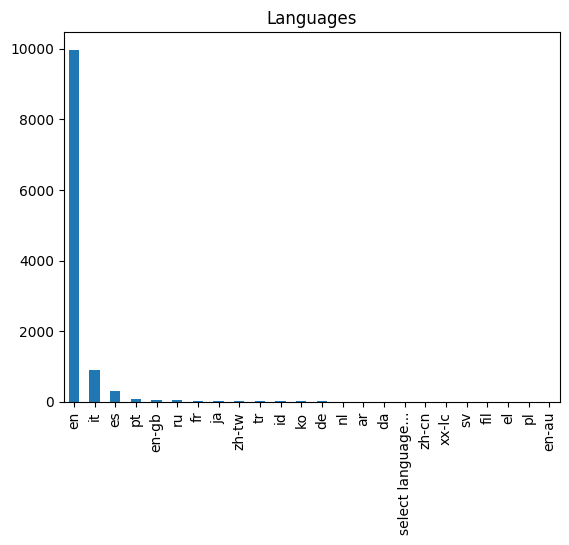

In [64]:
users['lang'].value_counts().plot(kind='bar', title='Languages')
plt.show()